# Importing Libraries

In [95]:
import pandas as pd
import numpy as np
import sweetviz
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import math
import re
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode , iplot , plot
init_notebook_mode(connected = True)
import cufflinks as cf
cf.go_offline()
from pandas import Series, DataFrame

from scipy.stats import pointbiserialr, spearmanr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report , confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
                       skiprows = 1 , header = None)
test_set.head()                       

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [4]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
             'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
             'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [5]:
train_set.columns = col_labels

In [6]:
test_set.columns = col_labels

In [7]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
print('Train Data - rows:' , train_set.shape[0],'columns:', train_set.shape[1])
print('-----------------------------------------------------------')
print('Test Data - rows:' , test_set.shape[0],'columns:', test_set.shape[1])

Train Data - rows: 32561 columns: 15
-----------------------------------------------------------
Test Data - rows: 16281 columns: 15


# Checking Percentage of missing data

In [9]:
total = train_set.isnull().sum().sort_values(ascending = False)
percent = (train_set.isnull().sum()/train_set.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,wage_class,native_country,hours_per_week,capital_loss,capital_gain,sex,race,relationship,occupation,marital_status,education_num,education,fnlwgt,workclass,age
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# training data is clean

In [11]:
# Checking missing data in the test dataset
print("There is {} missing values in the dataframe".format(test_set.isnull().sum().sum()))

There is 0 missing values in the dataframe


In [12]:
# test dataset is also clean

# Comparing datatypes of both training and test data

In [13]:
pd.DataFrame([train_set.dtypes, test_set.dtypes] ,index=['train_set','test_set'] ).T

,train_set,test_set
age,int64,int64
workclass,object,object
fnlwgt,int64,int64
education,object,object
education_num,int64,int64
marital_status,object,object
occupation,object,object
relationship,object,object
race,object,object
sex,object,object


In [14]:
# Checking unique values of target
train_set['wage_class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [15]:
n_records = train_set.shape[0]
n_greater_50k = train_set[train_set['wage_class'] == ' >50K'].shape[0]
n_at_most_50k =  train_set[train_set['wage_class'] == ' <=50K'].shape[0]
greater_percent = (n_greater_50k / n_records) * 100
print("Total Number of records: {}".format(n_records))
print("Individuals making more than $50000: {}".format(n_greater_50k))
print("Individuals making at most $50000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50000: {}%".format(greater_percent))

Total Number of records: 32561
Individuals making more than $50000: 7841
Individuals making at most $50000: 24720
Percentage of individuals making more than $50000: 24.080955744602438%


In [16]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [17]:
# Data Cleaning - Removing placeholder '?' from the dataframe

In [18]:
train_set.replace(" ?" , np.nan).dropna()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [19]:
test_set.replace(" ?" , np.nan).dropna()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [20]:
# Assigning train_set and test_set to a new variable

In [21]:
train_df = train_set.replace(" ?" , np.nan).dropna()

In [22]:
test_df = test_set.replace(" ?" , np.nan).dropna()

# EDA with Sweetviz

In [23]:
# result = sweetviz.analyze([train_df,"TrainData"], target_feat = 'wage_class')

In [24]:
# result = sweetviz.analyze([test_set,"TestData"], target_feat = 'wage_class')

In [25]:
train_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [26]:
train_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [27]:
# train_df = train_set[:]

In [28]:
# test_df = test_set[:]

In [29]:
# Here i put the train and test set into one so i dont have to keep seperately performing feature engineering
# Also separating cat and num columns

In [30]:
# all_data=[train_df, test_df]
# cat_list=[]

# for data in all_data:
#     for colname, colvalue in data.iteritems(): 
#         if type(colvalue[1]) == str:
#             cat_list.append(colname) 
# num_list = data.columns.difference(cat_list)

In [31]:
# replacing the placeholder "?" with NaN values and dropping all the null values in the dataframe

In [32]:
# for data in all_data:
#     for i in data.columns:
#         data[i].replace(' ?', np.nan, inplace=True)
#     data.dropna(inplace=True)

# Tidying up the wage column

In [33]:
# train_df['wage_class'] = train_df['wage_class'].replace({" <=50K.": "<=50k" , " >50K.":">50K"})


In [34]:
# test_df['wage_class'] = test_df['wage_class'].replace({" <=50K.": "<=50k" , " >50K.":">50K"})

In [35]:
train_set2 = train_df[:]

In [36]:
test_set2 = test_df.copy()

In [37]:
# Run this when something goes wrong so u dont have to run everything from above
train_df = train_set2.copy()

In [38]:
test_df = test_set2.copy()

In [39]:
train_df.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

# Histogram for Age

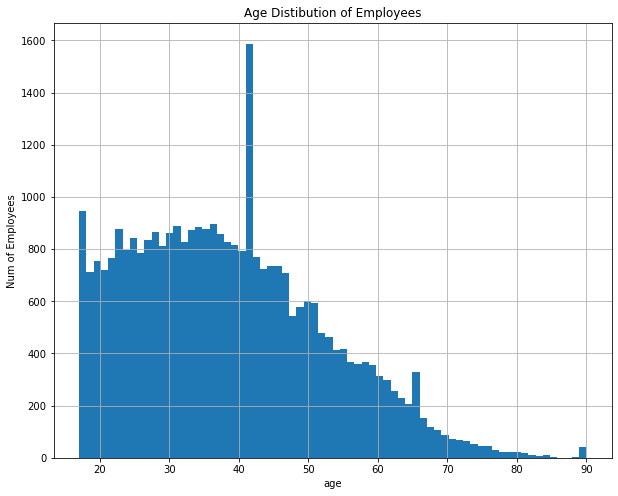

In [40]:
plt.figure(figsize=(10,8))
train_set['age'].hist(bins=70)
plt.title("Age Distibution of Employees")
plt.xlabel("age")
plt.ylabel("Num of Employees")
plt.show()

# Observation : Age of employees is rightly skewed and we also have some outliers

In [41]:
# Exploring further Age Distibution

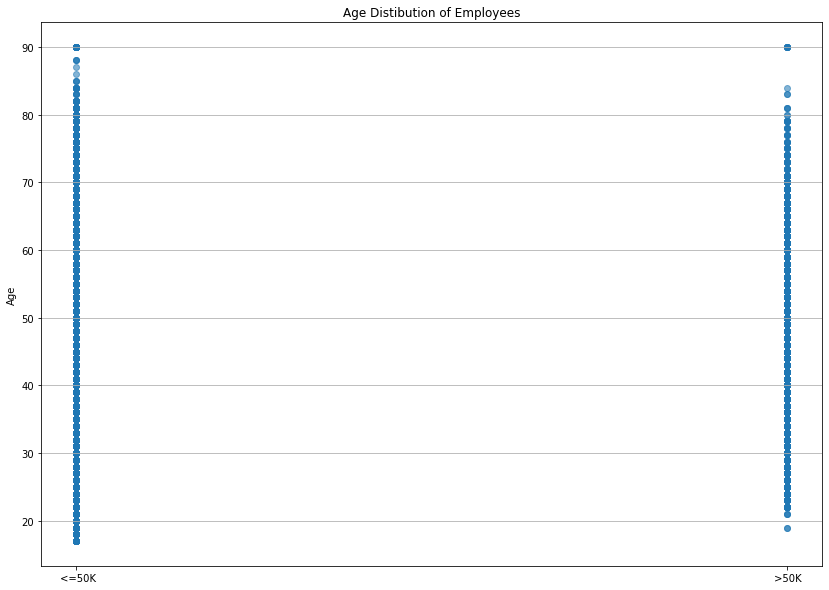

In [42]:
plt.figure(figsize=(14,10))
plt.scatter(train_set['wage_class'], train_set['age'] , alpha=.55)
plt.title("Age Distibution of Employees")
# plt.xlabel("age")
plt.ylabel("Age")
plt.grid(b=True , which = 'major', axis='y')
plt.show()

# Explore the Education columns

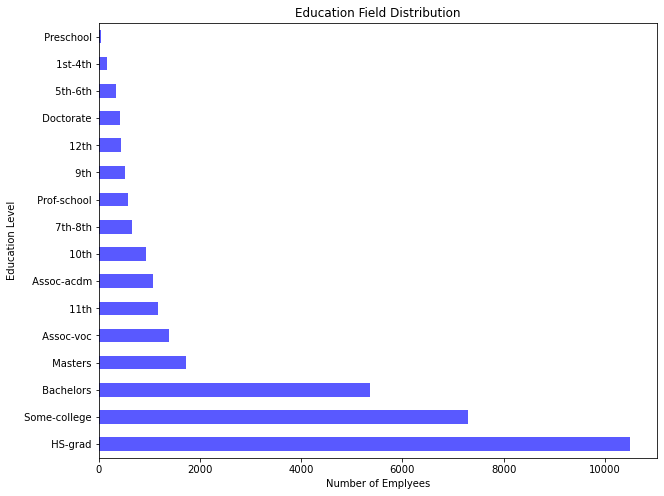

In [43]:
plt.figure(figsize=(10,8))
train_set['education'].value_counts().plot(kind='barh', color='blue',alpha=.65)
plt.title("Education Field Distribution")
plt.xlabel("Number of Emplyees")
plt.ylabel("Education Level")
plt.show()

# Explore data for Marital Status

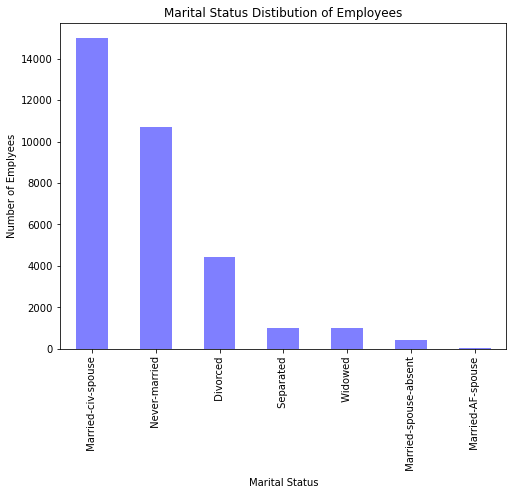

In [44]:
plt.figure(figsize=(8,6))
train_set['marital_status'].value_counts().plot(kind='bar', color='blue' , alpha=.5)
# plt.plot(kind='bar', color='b', alpha=.5)
plt.title("Marital Status Distibution of Employees")
plt.xlabel("Marital Status")
plt.ylabel("Number of Emplyees")
plt.show()

# Gender Distribution in the dataframe

In [45]:
#labels
lab = train_df["sex"].value_counts().keys().tolist()
#values
val = train_df["sex"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Gender distribution in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

![](newplot.png)

# Salary distribution between male and Female

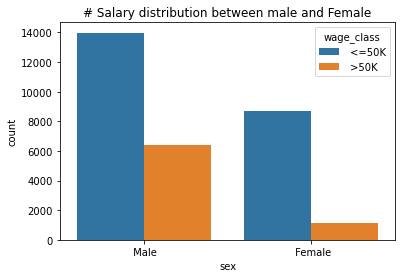

In [46]:
sns.countplot(x='sex' , hue = 'wage_class' , data = train_df)
plt.title("# Salary distribution between male and Female")
plt.show()

# Salary Distrubtion of Workclass

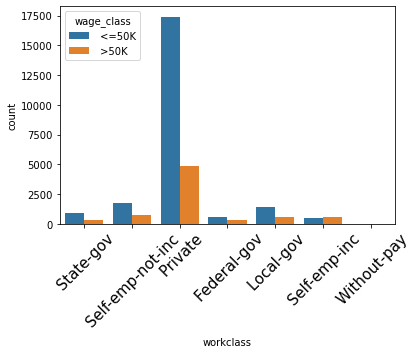

In [47]:
s = sns.countplot("workclass" , data= train_df , hue = 'wage_class')
s.set_xticklabels(s.get_xticklabels(), rotation = 45 , fontsize = 15)
plt.show()

In [48]:
# Note : we can see we have some placeholders in the columns

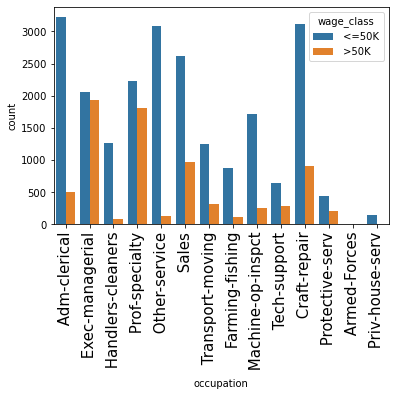

In [49]:
s = sns.countplot("occupation" , data= train_df , hue = 'wage_class')
s.set_xticklabels(s.get_xticklabels(), rotation = 'vertical' , fontsize = 15)
plt.show()

# Salary distribution based on education

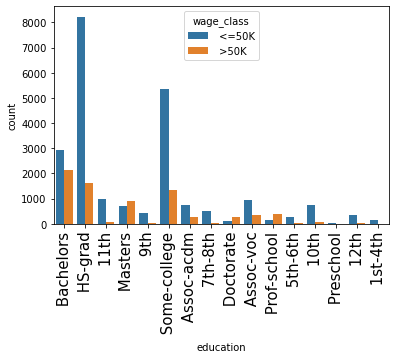

In [50]:
s = sns.countplot("education" , data= train_df , hue = 'wage_class')
s.set_xticklabels(s.get_xticklabels(), rotation = 90 , fontsize = 15)
plt.show()

# Salary Distribution , Above and Below 50k

In [51]:
#labels
lab = train_df['wage_class'].value_counts().keys().tolist()
#values
val = train_df["wage_class"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Wage class distribution in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

![](newplot(1).png)

# Age vs Wage class

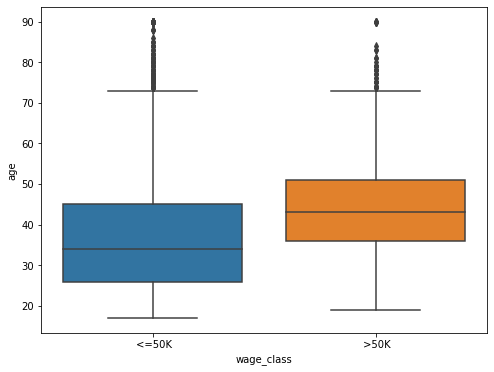

In [52]:
plt.figure(figsize = (8,6))
sns.boxplot(x='wage_class' , y = 'age' , data = train_df)
plt.show()

In [53]:
# Salary vs Race

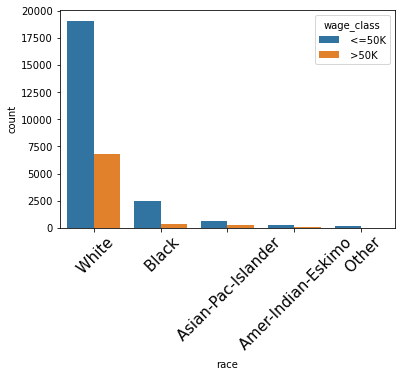

In [54]:
s = sns.countplot("race" , data= train_df , hue = 'wage_class')
s.set_xticklabels(s.get_xticklabels(), rotation = 45 , fontsize = 15)
plt.show()

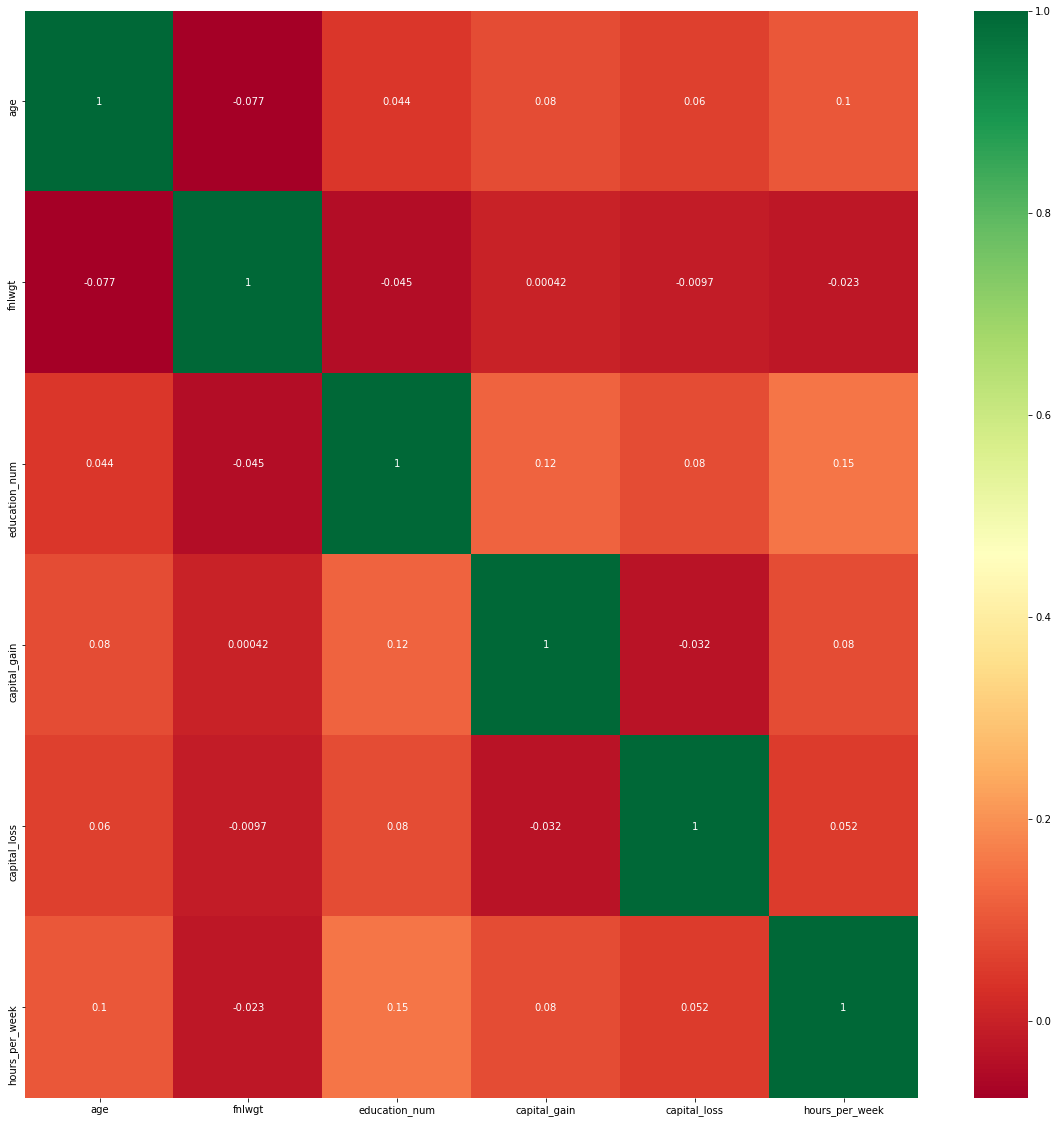

In [55]:
# Selecting correlated features using Heatmap

# Get correlation of all the features of the dataset
corr_matrix = train_df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data=train_df[top_corr_features].corr(), annot=True, cmap='RdYlGn') # viridis

In [56]:
# [' <=50K', ' >50K']

In [57]:
train_df1 = train_df.copy()

In [58]:
test_df1 = test_df.copy()

In [59]:
train_df1.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

# Feature Engineering 

In [60]:
# first i decided to convert the target column to 0 and 1

In [61]:
train_df1['wage_class']=train_df1['wage_class'].apply(lambda x: 1 if x==" >50K" else 0)

In [62]:
test_df1['wage_class']=test_df1['wage_class'].apply(lambda x:1 if x==" <=50K" else 0)


# Note : Since we have Many categrocal columns - hence I need to create dummy variables for them all

In [63]:
# i noticed manually manipulating each column will be time consuming so i skipped to creating dummy variables

In [64]:
# train_df1['sex']=train_df1['sex'].apply(lambda x: 1 if x==" Male" else 0)
# train_df1['race']=train_df1['race'].apply(lambda x: 1 if x==" White" else 0)
# train_df1['marital_status']=train_df1['marital_status'].apply(lambda x: " Married" if x.startswith('Married',1) else 'Single')
# train_df1['marital_status']=train_df1['marital_status'].apply(lambda x: 1 if x==" Married" else 0)


# test_df1['sex']=test_df1['sex'].apply(lambda x: 1 if x==" Male" else 0)
# test_df1['race']=test_df1['race'].apply(lambda x: 1 if x==" White" else 0)
# test_df1['marital_status']=test_df1['marital_status'].apply(lambda x: " Married" if x.startswith('Married',1) else 'Single')
# test_df1['marital_status']=test_df1['marital_status'].apply(lambda x: 1 if x==" Married" else 0)



# Getting all the categorical columns from the dataframe

In [65]:
cat_cols = list(set(train_df1.columns) - set(train_df1._get_numeric_data().columns))
cat_cols

['race',
 'occupation',
 'marital_status',
 'relationship',
 'workclass',
 'native_country',
 'sex',
 'education']

In [66]:
# creating dummy variables for categorical columns

In [67]:
train_df1 = pd.get_dummies(train_df1, columns=['native_country', 'workclass', 'relationship', 'sex', 'race', 
                                               'education', 'marital_status', 'occupation'] , drop_first = True)


In [69]:
test_df1 = pd.get_dummies(test_df1, columns=['native_country', 'workclass', 'relationship', 'sex', 'race', 
                                               'education', 'marital_status', 'occupation'] , drop_first = True)


In [ ]:
# Checking results

In [70]:
train_df1.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'wage_class', 'native_country_ Canada',
       'native_country_ China', 'native_country_ Columbia',
       'native_country_ Cuba', 'native_country_ Dominican-Republic',
       'native_country_ Ecuador', 'native_country_ El-Salvador',
       'native_country_ England', 'native_country_ France',
       'native_country_ Germany', 'native_country_ Greece',
       'native_country_ Guatemala', 'native_country_ Haiti',
       'native_country_ Holand-Netherlands', 'native_country_ Honduras',
       'native_country_ Hong', 'native_country_ Hungary',
       'native_country_ India', 'native_country_ Iran',
       'native_country_ Ireland', 'native_country_ Italy',
       'native_country_ Jamaica', 'native_country_ Japan',
       'native_country_ Laos', 'native_country_ Mexico',
       'native_country_ Nicaragua',
       'native_country_ Outlying-US(Guam-USVI-etc)', 'native_country_ Peru',
       'nati

In [71]:
len(train_df1.columns)

97

In [72]:
train_df1.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class,native_country_ Canada,native_country_ China,native_country_ Columbia,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Normalization of Numerical columns

In [73]:
from sklearn.preprocessing import StandardScaler
standScaler = StandardScaler()

In [74]:
columns_to_scale = ['age','education_num', 'capital_gain','capital_loss','hours_per_week']
train_df1[columns_to_scale] = standScaler.fit_transform(train_df1[columns_to_scale])

In [75]:
train_df1

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class,native_country_ Canada,native_country_ China,native_country_ Columbia,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,0.042796,77516,1.128918,0.146092,-0.218586,-0.077734,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.880288,83311,1.128918,-0.147445,-0.218586,-2.331531,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.033340,215646,-0.439738,-0.147445,-0.218586,-0.077734,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1.108695,234721,-1.224066,-0.147445,-0.218586,-0.077734,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,-0.794697,338409,1.128918,-0.147445,-0.218586,-0.077734,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.870832,257302,0.736754,-0.147445,-0.218586,-0.244682,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
32557,0.118931,154374,-0.439738,-0.147445,-0.218586,-0.077734,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
32558,1.489374,151910,-0.439738,-0.147445,-0.218586,-0.077734,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32559,-1.251511,201490,-0.439738,-0.147445,-0.218586,-1.747213,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()
# num_cols = ['age','education_num', 'capital_gain','capital_loss','hours_per_week']
# features_to_minmax = pd.DataFrame(data = features_log_transformed)
# features_to_minmax[num_cols] = sc.fit_transform(features_log_transformed[num_cols])


In [76]:
columns_to_scale2 = ['age','education_num', 'capital_gain','capital_loss','hours_per_week']
test_df1[columns_to_scale] = standScaler.fit_transform(test_df1[columns_to_scale])

In [77]:
test_df1

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class,native_country_ Canada,native_country_ China,native_country_ Columbia,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,-1.029005,226802,-1.216563,-0.145438,-0.219169,-0.078889,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,-0.057423,89814,-0.434898,-0.145438,-0.219169,0.750131,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,-0.804794,336951,0.737599,-0.145438,-0.219169,-0.078889,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.391000,160323,-0.044066,0.852624,-0.219169,-0.078889,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,-0.356371,198693,-1.607395,-0.145438,-0.219169,-0.907909,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,-0.431108,245211,1.128431,-0.145438,-0.219169,-0.078889,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16276,0.017315,215419,1.128431,-0.145438,-0.219169,-0.410497,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16278,-0.057423,374983,1.128431,-0.145438,-0.219169,0.750131,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16279,0.391000,83891,1.128431,0.562734,-0.219169,-0.078889,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Note since we used dummy variables now we need to remove all the unneccessary columns and choose only the important
# columns

In [78]:
train_df2 = train_df1.copy()

In [79]:
test_df2 = test_df1.copy()

In [80]:
train_df2.wage_class.unique()

array([0, 1])

# Feature selection

In [81]:
col_names = train_df2.columns
param = []
correlation = []
abs_corr = []
for x in col_names:
    if x != 'wage_class':
        if len(train_df2[x].unique()) <= 2:
            corr = spearmanr(train_df2['wage_class'], train_df2[x])[0]
        else:
            corr = pointbiserialr(train_df2['wage_class'] , train_df2[x])[0]
        param.append(x)
        correlation.append(corr)
        abs_corr.append(abs(corr))
param_df = pd.DataFrame({'correlation':correlation,'parameter':param, 'abs_corr':abs_corr})
param_df = param_df.sort_values(by=['abs_corr'], ascending=False)
param_df = param_df.set_index('parameter')
param_df

,correlation,abs_corr
parameter,,
marital_status_ Married-civ-spouse,0.445418,0.445418
education_num,0.335286,0.335286
marital_status_ Never-married,-0.320053,0.320053
age,0.241998,0.241998
hours_per_week,0.229480,0.229480
...,...,...
native_country_ Cuba,0.002919,0.002919
native_country_ Ireland,-0.002649,0.002649
education_ Assoc-acdm,0.002170,0.002170


# Checking top features

In [82]:
best_features = param_df.index[0:12].values
print("best features:\t" , best_features)

best features:	 ['marital_status_ Married-civ-spouse' 'education_num'
 'marital_status_ Never-married' 'age' 'hours_per_week'
 'relationship_ Own-child' 'capital_gain' 'sex_ Male'
 'occupation_ Exec-managerial' 'relationship_ Not-in-family'
 'occupation_ Prof-specialty' 'education_ Bachelors']


In [ ]:
# Note : i decided to use another method hence going back to redoing feature engineering.

In [89]:
train_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Finding all categorical columns

In [90]:
for x in train_df.columns:
    if train_set[x].dtypes == "object":
        print(x)

workclass
education
marital_status
occupation
relationship
race
sex
native_country
wage_class


# How many features do our categorical variables have?

In [91]:
train_df.workclass.nunique(),train_df.education.nunique(),train_df.marital_status.nunique(),train_df.native_country.nunique()


(7, 16, 7, 41)

# Train and Test Data combination

In [92]:
X_train = train_df[:]
X_test = test_df[:]

# Create a sample for visualization

In [93]:
sampling = X_train.append(X_test)
sampling.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [97]:
# Checking statistical analysis for sampling
sampling.describe(include=["O"])

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,45222,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41,4
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33307,14783,21055,6020,18666,38903,30527,41292,22654


# Feature Engineering

#### Converting categorical values to Numerical 

# <a id ='7'>Target Column</a>

In [104]:
train_df['wage_class']=train_df['wage_class'].apply(lambda x: 1 if x==" >50K" else 0)
test_df['wage_class']=test_df['wage_class'].apply(lambda x: 1 if x==" >50K" else 0)

# <a id ='7'>Sex</a>

In [105]:
sex = {}
count = 0
for x in X_train.sex.unique():
    sex[x] = count
    count += 1
sex    

{' Male': 0, ' Female': 1}

# <a id ='7'>Workclass</a>

In [106]:
workclass = {}
count = 0
for x in X_train["workclass"].unique():
    workclass[x] = count
    count +=1
workclass    

{' State-gov': 0,
 ' Self-emp-not-inc': 1,
 ' Private': 2,
 ' Federal-gov': 3,
 ' Local-gov': 4,
 ' Self-emp-inc': 5,
 ' Without-pay': 6}

# <a id ='7'>Education</a>

In [108]:
education = {}
count = 0
for x in X_train["education"].unique():
    education[x] = count
    count +=1
education    

{' Bachelors': 0,
 ' HS-grad': 1,
 ' 11th': 2,
 ' Masters': 3,
 ' 9th': 4,
 ' Some-college': 5,
 ' Assoc-acdm': 6,
 ' 7th-8th': 7,
 ' Doctorate': 8,
 ' Assoc-voc': 9,
 ' Prof-school': 10,
 ' 5th-6th': 11,
 ' 10th': 12,
 ' Preschool': 13,
 ' 12th': 14,
 ' 1st-4th': 15}

# <a id ='7'>Marital Status</a>

In [109]:
mar_status = {}
count = 0
for x in X_train["marital_status"].unique():
    mar_status[x] = count
    count +=1
mar_status    

{' Never-married': 0,
 ' Married-civ-spouse': 1,
 ' Divorced': 2,
 ' Married-spouse-absent': 3,
 ' Separated': 4,
 ' Married-AF-spouse': 5,
 ' Widowed': 6}

# <a id ='7'>Occupation</a>

In [110]:
occupation = {}
count = 0
for x in X_train["occupation"].unique():
    occupation[x] = count
    count += 1
occupation    

{' Adm-clerical': 0,
 ' Exec-managerial': 1,
 ' Handlers-cleaners': 2,
 ' Prof-specialty': 3,
 ' Other-service': 4,
 ' Sales': 5,
 ' Transport-moving': 6,
 ' Farming-fishing': 7,
 ' Machine-op-inspct': 8,
 ' Tech-support': 9,
 ' Craft-repair': 10,
 ' Protective-serv': 11,
 ' Armed-Forces': 12,
 ' Priv-house-serv': 13}

# <a id ='7'>Relationship</a>

In [111]:
relationship = {}
count = 0
for x in X_train["relationship"].unique():
    relationship[x] = count
    count +=1
relationship    

{' Not-in-family': 0,
 ' Husband': 1,
 ' Wife': 2,
 ' Own-child': 3,
 ' Unmarried': 4,
 ' Other-relative': 5}

In [ ]:
# <a id ='7'>Target Column</a>

In [ ]:
<a id ='7'>Target Column</a>

# Building My Model

In [ ]:
from sklearn.model_selection import train_test_split